### This Notebook Created by Ehsan Khoapanah Aghdam (`engtekh@gmail.com`) for Analysis of Signals and Systems by Dr. Hadi Seyed-Arabi
<p align="center">
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/University_of_tabriz_vector_blue_org.svg/1920px-University_of_tabriz_vector_blue_org.svg.png' alt="drawing" width="200"/>
</p>

# Fourier Transform

> - ### Continues
> This occurs when the functional form of your time series is known analytically (i.e. you have a formula $x(t)=...$ for it) and goes from > $-\infty$ to $\infty$:
>$$\hat{x}(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} dt $$
> - ### Discrete
> we consider a discrete time series $x[n]$:
>$$\hat{x}(f) = \sum_{n=-\infty}^{\infty} x[n] e^{-j 2 \pi f n }$$


In [42]:
import sympy

t, f = sympy.symbols('t, f', real=True)
k = sympy.symbols('k', real=True, positive=True)
x = sympy.exp(-k * t**2) * k * t; x

k*t*exp(-k*t**2)

**Solving Analytically (If Possible)**: Be careful giving proper information about your variables when you define them for sympy to work properly!

In [2]:
from sympy.integrals.transforms import fourier_transform

x_f = fourier_transform(x, t, f); x_f

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

**Solving Numerically**: Sometimes sympy can't evaluate integrals analytically, in which case you'll need to use scipy

In [43]:
# Won't run
x = sympy.exp(-k * t**2) * sympy.sin(k*t) * t**4
fourier_transform(x, t, f)

KeyboardInterrupt: 

In [7]:
from scipy.integrate import quad
import numpy as np

# Define function we want to take Fourier transform of and function to compute Fourier transform
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t) * t**4

def get_x_f(x, f, k):
    x_t_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_t_imag = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_f_real = quad(x_t_real, -np.inf, np.inf)[0]
    x_f_imag = quad(x_t_imag, -np.inf, np.inf)[0]
    return x_f_real + 1j*x_f_imag

Get frequencies and Fourier transform values and plot

Text(0.5, 0, '$f$')

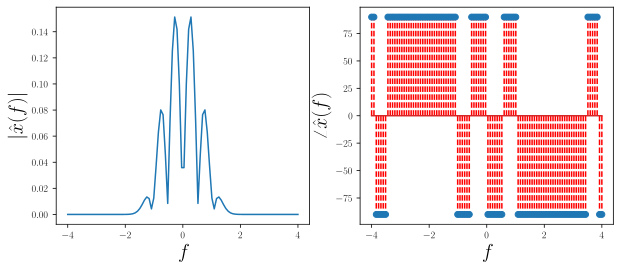

In [17]:
f = np.linspace(-4, 4, 100)
x_f = np.vectorize(get_x_f)(x, f, k=2)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].plot(f, np.abs(x_f))
ax[0].set_ylabel('$|\hat{x}(f)|$', fontsize=20)
ax[0].set_xlabel('$f$', fontsize=20)

ax[1].stem(f, np.angle(x_f) * (180/np.pi), 'r--')
ax[1].set_ylabel('$\\angle \hat{x}(f)$', fontsize=20)
ax[1].set_xlabel('$f$', fontsize=20)

> * ## Discrete Example

Text(0, 0.5, '${x_3}(t)$')

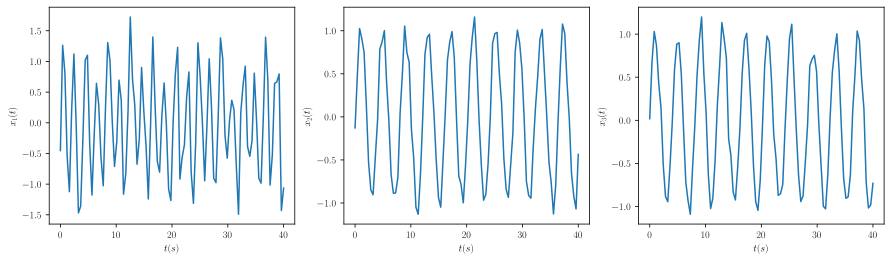

In [24]:
T = 40 #seconds
N = 100 #measurements
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

# Look at a couple particular frequencies
f1 = 20/(N*dt)
f2 = 10/(N*dt)
f3 = (10+5*N)/(N*dt)

from scipy.fft import fftfreq, fft
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['text.usetex'] = True

x1 = np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.3*np.random.randn(len(t))
x2 = np.sin(2*np.pi*f2*t)+ 0.1*np.random.randn(len(t))
x3 = np.sin(2*np.pi*f3*t)+ 0.1*np.random.randn(len(t))

fig, ax = plt.subplots(1, 3, figsize = [15, 4])
ax[0].plot(t, x1)
ax[0].set_xlabel('$t(s)$')
ax[0].set_ylabel('${x_1}(t)$')

ax[1].plot(t, x2)
ax[1].set_xlabel('$t(s)$')
ax[1].set_ylabel('${x_2}(t)$')

ax[2].plot(t, x3)
ax[2].set_xlabel('$t(s)$')
ax[2].set_ylabel('${x_3}(t)$')


Plot the first half of the spectrum (for $x[n]$ real, all information is contained in the first half)

Text(0, 0.5, '$\\angle \\hat{x}_f$')

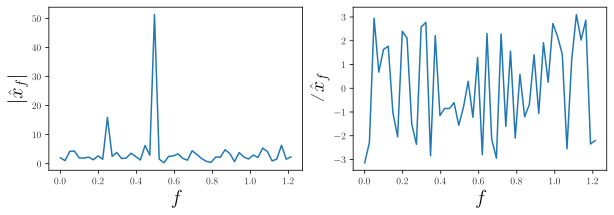

In [34]:
f = fftfreq(len(t), np.diff(t)[0])
x1_f = fft(x1)

fig, ax = plt.subplots(1, 2, figsize= [10, 3])
ax[0].plot(f[:N//2], np.abs(x1_f[:N//2]))
ax[0].set_xlabel('$f$', fontsize=20)
ax[0].set_ylabel('$|\hat{x}_f|$', fontsize=20)

ax[1].plot(f[:N//2], np.angle(x1_f[:N//2]))
ax[1].set_xlabel('$f$', fontsize=20)
ax[1].set_ylabel('$\\angle \hat{x}_f$', fontsize=20)

Demonstrate that $\hat{x}_f = \hat{x}_{f+5N}$ here:

0.24750000000000003
12.6225


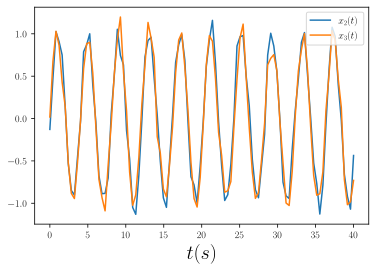

In [36]:
print(f2)
print(f3)

plt.plot(t, x2, label='${x_2}(t)$')
plt.plot(t, x3, label ='${x_3}(t)$')
plt.xlabel('$t(s)$', fontsize=20)
plt.legend()

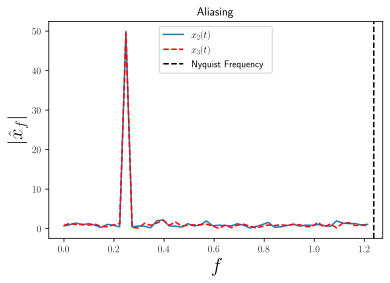

In [41]:
x2_f = fft(x2)
x3_f = fft(x3)

plt.plot(f[:N//2], np.abs(x2_f[:N//2]), label='$x_2(t)$')
plt.plot(f[:N//2], np.abs(x3_f[:N//2]), 'r--', label='$x_3(t)$')
plt.axvline(1/(2*dt), ls='--', color='k', label = 'Nyquist Frequency')
plt.xlabel('$f$', fontsize=20)
plt.ylabel('$|\hat{x}_f|$', fontsize=20)
plt.title('Aliasing')
plt.legend()